<a href="https://colab.research.google.com/github/muscak/Master-Machine-Learning-Algorithms/blob/master/Nonlinear-Algorithms/Support-Vector-Machines/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines (SVM)

In machine learning, support vector machines (SVMs, also support vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis [1].

## Table of Contents

1. [Introduction](#intro)
2. [Libraries](#libraries)
3. [Create Sample Data](#sample)
4. [Manual Implementation](#manual)
5. [Using Sklearn Library](#sklearn)
6. [Iris Dataset](#iris)
7. [Conclusion](#conclusion)

## 1. Introduction<a id='intro'></a>

Basic SVM as described in this chapter is intended for binary classification problems. Although, extensions have been developed for regression and multiclass classification.

## 2. Import Libraries<a id='libraries'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
sb.set_style('whitegrid')
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

## 3. Create Sample Data<a id='sample'></a>

The dataset contains two input variables ($x_1$ and $x_2$) and the class output variable with the values -1 and 1. The dataset contains 10 records, 5 that belong to each class.

In [2]:
x1 = [2.327868056, 3.032830419, 4.485465382, 3.684815246, 2.283558563, 
      7.807521179, 6.132998136, 7.514829366, 5.502385039, 7.432932365]
x2 = [2.458016525, 3.170770366, 3.696728111, 3.846846973, 1.853215997, 
      3.290132136, 2.140563087, 2.107056961, 1.404002608, 4.236232628]
y = [-1, -1, -1, -1, -1, 1, 1, 1, 1, 1]

df = pd.DataFrame(zip(x1, x2, y), columns=['x1', 'x2', 'y'])
df

,x1,x2,y
0,2.327868,2.458017,-1
1,3.032830,3.170770,-1
2,4.485465,3.696728,-1
3,3.684815,3.846847,-1
4,2.283559,1.853216,-1
5,7.807521,3.290132,1
6,6.132998,2.140563,1
7,7.514829,2.107057,1
8,5.502385,1.404003,1
9,7.432932,4.236233,1


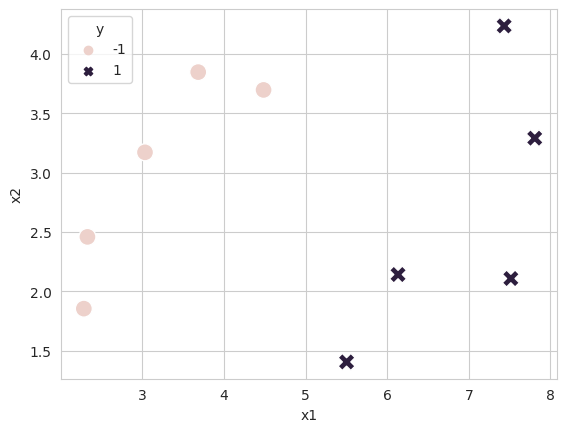

In [3]:
sb.scatterplot(data=df, x='x1', y='x2', hue='y', style='y', s=150)
plt.show()

## 4. Manual Implementation<a id='manual'></a>

$$(b_1 × x_1) + (b_2 × x_2) = 0$$ 
We'll assume bias term ($b_0$) also called the intercept as 0.

### Optimization Method

$$output = y × ((b_1 × x_1) + (b_2 × x_2) + ... + (b_i × x_i))$$

If the output value is greater than 1 it suggests that the training pattern was not a support vector and in this case the weights ($b_i$) are slightly decreased:
$$b_{ij+1} = (1 - \frac{1}{t}) × b_{ij}$$

Else, it is assumed that the training instance is a support vector and must be updated to better explain the data.
$$b_{ij+1} = (1 - \frac{1}{t}) × b_{ij} + \frac{1}{λ × t} × (y_j × x_{ij})$$

In [4]:
def train(df, epoch):
  # Set the initial weights
  b1 = 0
  b2 = 0

  # Set the learning rate
  lr = 0.45 

  # Define the training dataset
  df_train = pd.DataFrame(columns=['x1', 'x2', 'y', 'b1', 'b2', 'output', 
                                  'prediction', 'sharp', 'error'])
  
  # Define the array to store the accuracy score of each epoch
  accuracy = []

  # Concat the temp dataset to the trainin dataset by ignoring the index
  for i in range(0, epoch):
    df_temp = df.copy()
    df_train = pd.concat([df_train, df_temp], ignore_index=True)

  # Set the initial weights in the dataset 
  df_train.loc[0, 'b1'] = b1
  df_train.loc[0, 'b2'] = b2

  for j in range(0, len(df_train)):
    # Calculate the output value as per the formula above
    df_train.loc[j, 'output'] = df_train.loc[j, 'y'] * ((df_train.loc[j, 'b1'] * df_train.loc[j, 'x1']) + (df_train.loc[j, 'b2'] * df_train.loc[j, 'x2']))
    # Calculate the weights that will be used in the next iteration as per the rules above
    if(j+1 < len(df_train)):
      if(df_train.loc[j, 'output'] < 1):
        df_train.loc[j+1, 'b1'] = (1 - 1/(j+1)) * df_train.loc[j, 'b1'] + (1/(lr*(j+1))) * df_train.loc[j, 'y'] * df_train.loc[j, 'x1']
        df_train.loc[j+1, 'b2'] = (1 - 1/(j+1)) * df_train.loc[j, 'b2'] + (1/(lr*(j+1))) * df_train.loc[j, 'y'] * df_train.loc[j, 'x2']
      else:
        df_train.loc[j+1, 'b1'] = (1 - 1/(j+1)) * df_train.loc[j, 'b1']
        df_train.loc[j+1, 'b2'] = (1 - 1/(j+1)) * df_train.loc[j, 'b2']

  # Predict using the new weights
  df_train['prediction'] = (df_train['b1'] * df_train['x1']) + (df_train['b2'] * df_train['x2'])
  # Sharpen the prediction
  df_train.loc[df_train['prediction'] < 0, 'sharp'] = -1
  df_train.loc[df_train['prediction'] >= 0, 'sharp'] = 1

  # Check if the sharpened prediction is correct
  df_train.loc[df_train['sharp'] == df_train['y'], 'error'] = 0
  df_train.loc[df_train['sharp'] != df_train['y'], 'error'] = 1

  l = 0

  # Calculate the accuracy and added to the array
  for k in range(0, epoch):
    df_temp = df_train.loc[l:l+len(df)-1,].copy()
    acc = (1 - (df_temp['error'].sum() / len(df))) * 100
    accuracy.append(acc)
    l += len(df) - 1

  # Plot the accuracy change for each epoch
  x_ticks = np.arange(start=1, stop=epoch, step=1)
  y_ticks = np.arange(start=0, stop=110, step=10)

  plt.plot(accuracy, linewidth=3)
  plt.xticks(x_ticks)
  plt.yticks(y_ticks)
  plt.xlabel('Epochs', fontsize=12)
  plt.ylabel('Accuracy', fontsize=12)
  plt.show()

  return df_train

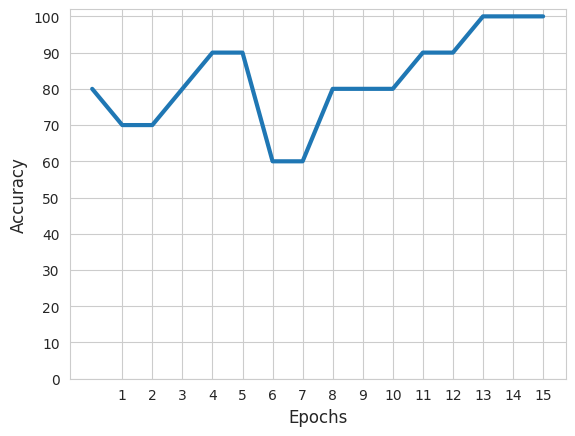

In [5]:
df_train = train(df, 16)

## Prediction

In [6]:
def predict(df, b1, b2):
  df_prediction = df.copy()

  df_prediction['output'] = b1*df_prediction['x1'] + b2*df_prediction['x2']
  df_prediction.loc[df_prediction['output'] < 0, 'sharp'] = -1
  df_prediction.loc[df_prediction['output'] >= 0, 'sharp'] = 1

  df_prediction.loc[df_prediction['sharp'] == df_prediction['y'], 'error'] = 0
  df_prediction.loc[df_prediction['sharp'] != df_prediction['y'], 'error'] = 1

  acc = (1 - (df_prediction['error'].sum() / len(df))) * 100

  print('Accuracy: {:.0f}%'.format(acc))

In [7]:
b1 = df_train['b1'].iloc[-1]
b2 = df_train['b2'].iloc[-1]

print('b1:',b1)
print('b2:',b2)
predict(df, b1, b2)

b1: 0.5558659268623344
b2: -0.7290904074493363
Accuracy: 100%


🔎 **Observation:**

### Another Sample Data

We'll create a new dataset using the `make_classification` of `sklearn`. The dataset contains two input variables ($x_1$ and $x_2$) and the class output variable with the values -1 and 1. The dataset contains 100 records, 50 that belong to each class.

In [8]:
x, y = make_classification(
    n_samples=100, # 100 observations 
    n_features=2, # 2 total features
    n_informative=2, # 2 'useful' features
    n_redundant=0, # No redundant features
    n_classes=2, # binary target/label 
    random_state=101 # if you want the same results as mine
)

y = 2*y - 1 # Turn the labels to -1 and 1 so it's aligned with the previous dataset

# Turn it into dataframe
df_new = pd.DataFrame(zip(x[:,0], x[:,1], y), columns=['x1', 'x2', 'y'])
df_new.head()

,x1,x2,y
0,2.346697,1.998119,1
1,2.407103,2.203878,1
2,-0.077088,-1.432589,-1
3,2.739183,1.153256,1
4,-0.755062,0.614306,1


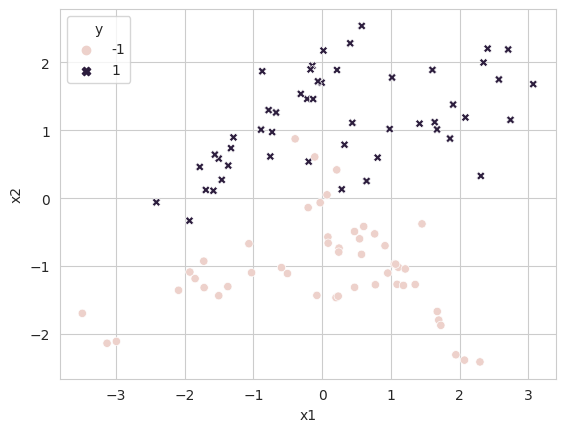

In [9]:
# Checking the relation between the label and the numerical features
sb.scatterplot(data=df_new, x='x1', y='x2', hue='y', style='y')
plt.show()

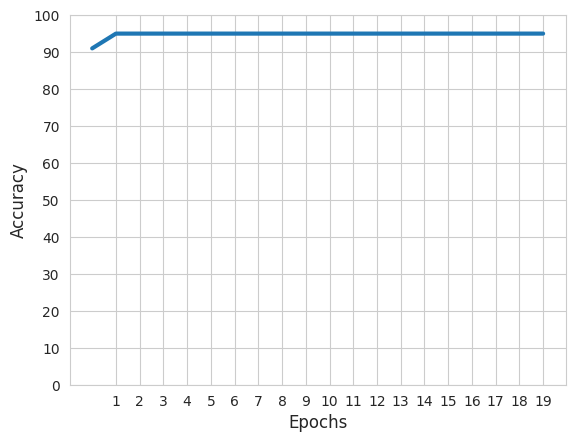

In [10]:
df_train = train(df_new, 20)

In [11]:
b1 = df_train['b1'].iloc[-1]
b2 = df_train['b2'].iloc[-1]

print('b1:',b1)
print('b2:',b2)
predict(df_new, b1, b2)

b1: -0.05438981707750329
b2: 0.824493412862236
Accuracy: 95%


🔎 **Observation:**

## 5. Using Sklearn Library<a id='sklearn'></a>

We'll use the `svc` function of `sklearn` library for the same dataset.


In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [13]:
model = SVC(verbose=True, kernel='linear')
clf = model.fit(x, y)

[LibSVM]

In [14]:
print(clf.coef_)
y_hat = model.predict(x)
acc = accuracy_score(y, y_hat) * 100
print('Accuracy: {:.0f}%'.format(acc))

[[-0.36456372  1.82946623]]
Accuracy: 95%


## 6. Iris Dataset<a id='iris'></a>

We'll classify the flowers in the wellknown Iris dataset using Support Vector Classifier `SVC` from `sklearn` library.

In [15]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Preparing Data

The only assumption that SVC makes is that all inputs are numeric. 

In [16]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


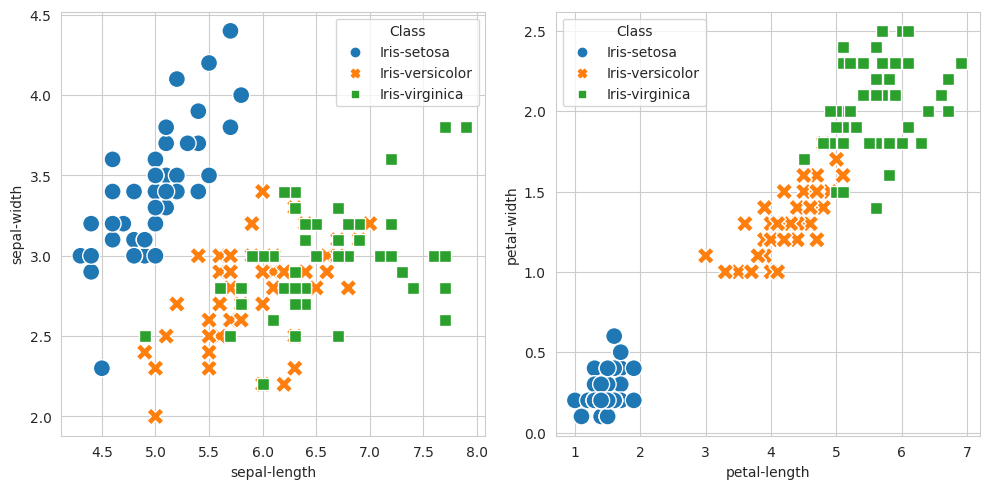

In [17]:
# Checking the relation between the label and the numerical features
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sb.scatterplot(ax=axes[0], data=dataset, x='sepal-length', y='sepal-width', hue='Class', style='Class', s=150)
sb.scatterplot(ax=axes[1], data=dataset, x='petal-length', y='petal-width', hue='Class', style='Class', s=150)
plt.tight_layout()
plt.show()

In [18]:
dataset['Class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

In [19]:
# Replace the string labels with numeric values
dataset.replace({'Class':{'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}}, inplace=True)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x = dataset.drop('Class', axis='columns')
y = dataset['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [22]:
model = SVC()
model.fit(x_train, y_train)

SVC()

In [23]:
y_hat = model.predict(x_test)
acc = accuracy_score(y_test, y_hat) * 100
print('Accuracy: {:.2f}%'.format(acc))

Accuracy: 96.67%


In [24]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



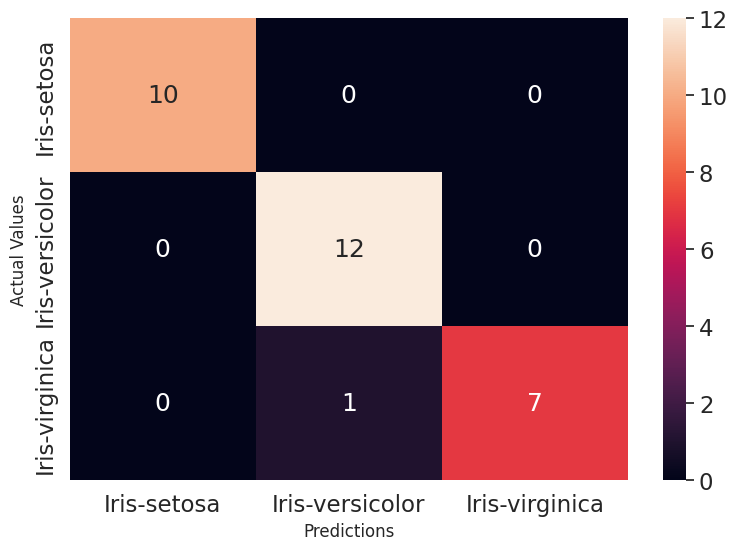

In [25]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_hat)
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
pred_labels = [l for l in labels]
cm_df = pd.DataFrame(cm, index=labels, columns=pred_labels)

sb.set(font_scale=1.5)
plt.figure(figsize=(9,6))
sb.heatmap(cm_df, annot=True, fmt='d')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actual Values', fontsize=12)
plt.show()

## 7. Conclusion<a id='conclusion'></a>

## References
---

[1] [Support vector machine](https://en.wikipedia.org/wiki/Support_vector_machine)